In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively, plot_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, KFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)[:10000]
    X_test = np.load(f2)
    y_train = np.load(f3)[:10000]
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)[:10000]
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)


(10000, 784) (10000, 784) (10000, 1) (10000, 1) (10000, 10) (10000, 10)


In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train_ohe, X_test=X_test, y_test=y_test_ohe,
                               binary_classification=False, include_train_results=True)


ValueError: Found input variables with inconsistent numbers of samples: [200, 10000]

In [5]:
print(train_res, test_res)

0.9615 0.9388


In [6]:
classifier = KNeighborsClassifier(n_neighbors=5)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [7]:
print(train_res, test_res)

0.9669 0.9442


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed 

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed 

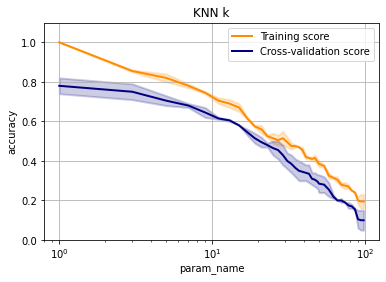

In [9]:
# optimize k

param_range = list(range(1, 50, 2)) + list(range(50, 100, 4))
cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = KNeighborsClassifier()
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='KNN k')


In [10]:
labeled_test

array([[ 1.   ,  0.78 ],
       [ 3.   ,  0.75 ],
       [ 5.   ,  0.705],
       [ 7.   ,  0.68 ],
       [ 9.   ,  0.645],
       [11.   ,  0.615],
       [13.   ,  0.605],
       [15.   ,  0.58 ],
       [17.   ,  0.545],
       [19.   ,  0.515],
       [21.   ,  0.495],
       [23.   ,  0.48 ],
       [25.   ,  0.465],
       [27.   ,  0.455],
       [29.   ,  0.43 ],
       [31.   ,  0.4  ],
       [33.   ,  0.385],
       [35.   ,  0.365],
       [37.   ,  0.35 ],
       [39.   ,  0.345],
       [41.   ,  0.34 ],
       [43.   ,  0.335],
       [45.   ,  0.31 ],
       [47.   ,  0.305],
       [49.   ,  0.295],
       [50.   ,  0.285],
       [54.   ,  0.28 ],
       [58.   ,  0.255],
       [62.   ,  0.22 ],
       [66.   ,  0.2  ],
       [70.   ,  0.2  ],
       [74.   ,  0.19 ],
       [78.   ,  0.175],
       [82.   ,  0.17 ],
       [86.   ,  0.155],
       [90.   ,  0.105],
       [94.   ,  0.1  ],
       [98.   ,  0.1  ]])

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

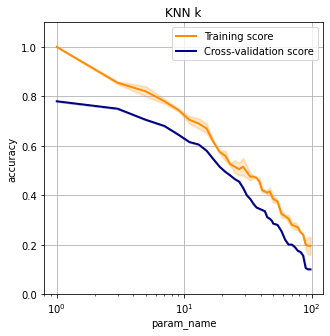

In [12]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='KNN k',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))

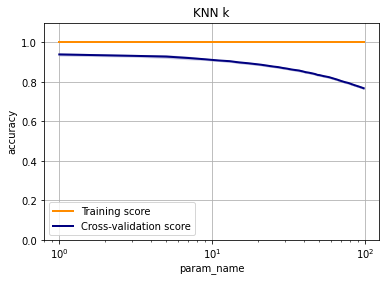

In [17]:
# optimize k

param_range = list(range(1, 50, 2)) + list(range(50, 100, 4))
cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = KNeighborsClassifier(weights='distance')
train_scores, test_scores, labeled_train, labeled_test, plt = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='n_neighbors', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='KNN k')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

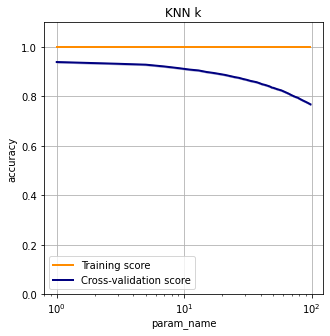

In [18]:
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='KNN k',
            scoring='accuracy', is_log_axis=True, 
            figsize=(5,5))

In [28]:
classifier = KNeighborsClassifier(weights='distance', n_neighbors=5)
classifier.fit(X_train, y_train_ohe)
n_1 = 0
n_5 = 0
memo = {}
for i in range(1, 10000):
    dist, ind = classifier.kneighbors(X_test[i].reshape(1,-1), 5)
    actual = y_test[i][0]
    if actual not in memo:
        memo[actual] = defaultdict(int)
    neighbors = y_train[ind].flatten()
    if neighbors[0] == actual:
        memo[actual][1] += 1
    neighbors = list(neighbors)
    if actual == max(neighbors,key=neighbors.count):
        memo[actual][5] += 1
print(memo)

{2: defaultdict(<class 'int'>, {1: 992, 5: 989}), 1: defaultdict(<class 'int'>, {1: 1129, 5: 1133}), 0: defaultdict(<class 'int'>, {1: 973, 5: 974}), 4: defaultdict(<class 'int'>, {1: 944, 5: 944}), 9: defaultdict(<class 'int'>, {1: 967, 5: 965}), 5: defaultdict(<class 'int'>, {1: 860, 5: 862}), 6: defaultdict(<class 'int'>, {1: 944, 5: 945}), 7: defaultdict(<class 'int'>, {1: 991, 5: 989}), 3: defaultdict(<class 'int'>, {1: 970, 5: 973}), 8: defaultdict(<class 'int'>, {1: 920, 5: 918})}


In [19]:
print(n_1, n_5)

1130 1129


In [58]:
max(neighbors,key=neighbors.count)


9

In [3]:
classifier = KNeighborsClassifier(n_neighbors=1)
train_res, test_res = fit_and_score_iteratively(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,
                               binary_classification=False, include_train_results=True)


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [4]:
print(train_res, test_res)

1.0 0.9463


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

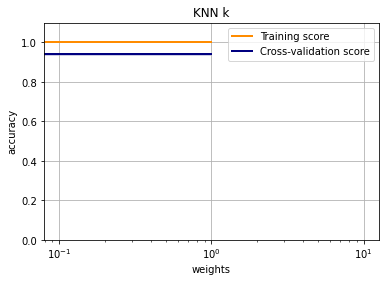

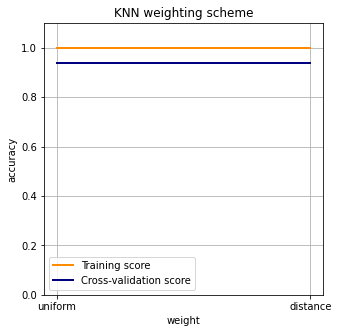

In [6]:
# try weights

param_range = ['uniform', 'distance']
cv = KFold(n_splits=2, shuffle=True, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=1)
train_scores, test_scores, labeled_train, labeled_test = plot_validation_curve(classifier, X_train, y_train_ohe, 
                      param_name='weights', param_range=param_range, 
                      cv=cv, scoring='accuracy', n_jobs=8, title='KNN k')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plot_curves(param_range, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, 
            title='KNN weighting scheme',
            scoring='accuracy', is_log_axis=False, 
            figsize=(5,5), param_name='weight')

# Learning Curves

iteration 1
{'train_sizes': array([ 350,  700, 1050, 1400, 1750, 2100, 2450, 2800, 3150, 3500]), 'train_scores_mean': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'train_scores_std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_scores_mean': array([0.82628571, 0.86942857, 0.88471429, 0.89328571, 0.901     ,
       0.90928571, 0.91557143, 0.91971429, 0.92385714, 0.92771429]), 'test_scores_std': array([0.00657143, 0.00114286, 0.00357143, 0.00214286, 0.00242857,
       0.00157143, 0.00014286, 0.        , 0.00071429, 0.00142857]), 'fit_times_mean': array([0.00175989, 0.00214005, 0.00406957, 0.00229359, 0.00288928,
       0.00257432, 0.00290084, 0.00294876, 0.00347233, 0.00322163]), 'fit_times_std': array([4.49776649e-04, 3.13758850e-04, 1.78623199e-03, 1.47581100e-04,
       2.35199928e-04, 1.94311142e-05, 1.58309937e-04, 2.33173370e-04,
       2.92062759e-04, 8.11815262e-05]), 'fit_times_train_size_ratio': 1.4685841349812297e-06, 'fit_times_test_score_ratio': 0.0031513426362

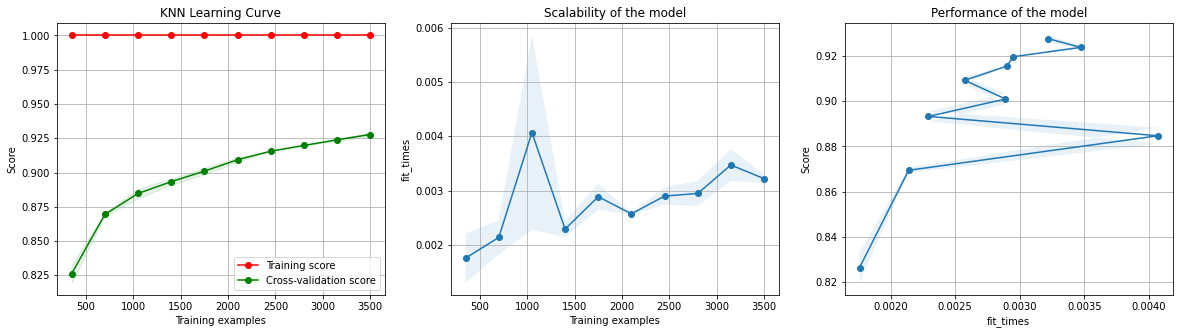

In [3]:
classifier = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'KNN Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)

print(results)


(60000, 784) (10000, 784) (60000, 1) (10000, 1) (60000, 10) (10000, 10)
iteration 1


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

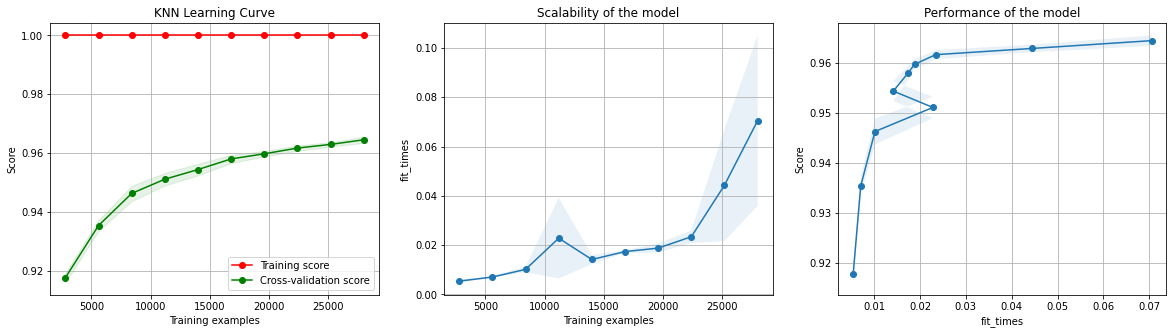

In [27]:
from time import time

with open('mnist_X_train', 'rb') as f1, \
    open('mnist_X_test', 'rb') as f2,\
    open('mnist_y_train', 'rb') as f3,\
    open('mnist_y_test', 'rb') as f4, \
    open('mnist_y_train_ohe', 'rb') as f5, \
    open('mnist_y_test_ohe', 'rb') as f6:
    X_train = np.load(f1)
    X_test = np.load(f2)
    y_train = np.load(f3)
    y_test = np.load(f4)
    y_train_ohe = np.load(f5)
    y_test_ohe = np.load(f6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_ohe.shape, y_test_ohe.shape)

classifier = KNeighborsClassifier(n_neighbors=1)
cv = KFold(n_splits=2, shuffle=True, random_state=0)

title = 'KNN Learning Curve'
results = plot_learning_curve(classifier, title, X_train, y_train_ohe, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)
